# Introduction to sklearn

In [96]:
# standard imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

## Scikit-learn workflow 
1. Getting data ready (split into features and labels, prepare train and test steps)
2. Choosing a model for our problem
3. Fit the estimator/model to the data and use it to make a prediction
5. Evaluate the model
6. Experiment to improve
7. Save a model

## Random Forest Classifier Workflow for Classifying Heart Disease

1. Get data ready

In [97]:
heart_disease = pd.read_csv('../ml-essentials/data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [99]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 target
 1    165
 0    138
 Name: count, dtype: int64)

2. Choose model and hyperparameters

In [100]:
from sklearn.ensemble import RandomForestClassifier
#instanciate the class
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

3. Fit the model to the training data

In [101]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25) # by default train_test_split uses 25% of the data for the test set

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [102]:
#fit the model to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
# make a prediction
y_preds = clf.predict(X_test) # takes the x_test data and predicts the targets
y_preds

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [104]:
y_test

253    0
222    0
9      1
30     1
89     1
      ..
198    0
148    1
164    1
139    1
228    0
Name: target, Length: 76, dtype: int64

4. Evaluate the model

In [105]:
# evaluate the model on training data
clf.score(X_train, y_train)

1.0

In [106]:
# evaluate on test data 
clf.score(X_test, y_test)

0.7368421052631579

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

# create a classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71        41
           1       0.65      0.91      0.76        35

    accuracy                           0.74        76
   macro avg       0.77      0.75      0.73        76
weighted avg       0.78      0.74      0.73        76



In [108]:
confusion_matrix(y_test, y_preds)

array([[24, 17],
       [ 3, 32]])

In [109]:
accuracy_score(y_test, y_preds)

0.7368421052631579

5. Improve the model

In [110]:
np.random.seed(42)
for i in range(10,100,20):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:2f}%")

Trying model with 10 estimators...
Model accuracy on test set: 71.052632%
Trying model with 30 estimators...
Model accuracy on test set: 73.684211%
Trying model with 50 estimators...
Model accuracy on test set: 71.052632%
Trying model with 70 estimators...
Model accuracy on test set: 71.052632%
Trying model with 90 estimators...
Model accuracy on test set: 73.684211%


6. Save a model and load it

In [111]:
import os
import pickle

# Create the directory if it doesn't exist
os.makedirs("saved-models", exist_ok=True)

pickle.dump(clf, open("saved-models/random_forest_model_1.pkl", "wb")) 

In [112]:
loaded_model = pickle.load(open("saved-models/random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7368421052631579

## 1.1 Making sure data is all numerical(car-sales dataset)

In [113]:
import pandas as pd


In [114]:
car_sales = pd.read_csv('./data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [115]:
len(car_sales), car_sales.dtypes

(1000,
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object)

In [116]:
# Split X and y 
X = car_sales.drop("Price", axis=1)
y = car_sales['Price']

# Split into training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)  

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [117]:
# Build a machine learning model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train )
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Nissan'

In [118]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [119]:
## Solve the problem above by converting the strings to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catergorical_features = ["Make","Colour", "Doors" ]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot, 
                                catergorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [120]:
pd.DataFrame(transformed_X)[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42652.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,163453.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,43120.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,130538.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,51029.0


In [121]:
### OR
dummies = pd.get_dummies(car_sales[["Make","Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [122]:
# Lets refit the model 
import numpy as np
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y,
                                                    test_size=0.2) 
model.fit(X_train,y_train )


RandomForestRegressor()

In [123]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values
1. Fill them with some values(also known as imputation)
2. Remove some samples with missing data altogether

### 1.2.1 Option1 : Filling missing values with pandas

In [124]:
import pandas as pd
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing 

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [125]:
# Check the sum of missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [126]:
# Split X and y 
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [127]:
## Solve the problem above by converting the strings to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catergorical_features = ["Make","Colour", "Doors" ]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot, 
                                catergorical_features)],
                               remainder="passthrough")

transformed_X_missing = transformer.fit_transform(X)
transformed_X_missing

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [128]:
# Fill the missing values in the Make column
car_sales_missing["Make"] = car_sales_missing["Make"].fillna(value="missing")

# Fill the colour column
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna(value="missing")



In [129]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [130]:
# Fill the doors with the most common figure
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(value=4)
# Fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(value=car_sales_missing["Odometer (KM)"].mean())



In [131]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [132]:
# Remove rows with missing Price labels
car_sales_missing.dropna(inplace=True)

In [133]:
# Check the number of total samples (previously was 1000)
len(car_sales_missing)

950

In [134]:
# Create features
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values:\n{X_missing.isna().sum()}")

# Create labels
y_missing = car_sales_missing["Price"]
print(f"Number of missing y values: {y_missing.isna().sum()}")

Number of missing X values:
Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64
Number of missing y values: 0


In [135]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

transformed_X_missing = transformer.fit_transform(X_missing)
transformed_X_missing

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [136]:
# Split data into training and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X_missing,
                                                    y_missing,
                                                    test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22011714008302485

### 1.2.2 Filling missing values with scikit-learn

In [137]:
import pandas as pd 
car_sales_missing= pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [138]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [139]:
# drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [140]:
# there are now no missing values in the price column 
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [141]:
# Split data into X and y 
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

### Predicting housing prices 

In [142]:
import pandas as pd
import sklearn
import numpy as np

In [143]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing #downloads as a dictionary

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [144]:
housing_df = pd.DataFrame(housing["data"], columns=housing['feature_names'])
#housing_df['MedHouseVal']= housing["target"]
housing_df["target"] = housing["target"]
housing_df.head()

#using feature names to predict 'target_names': ['MedHouseVal']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [145]:
# How many samples?
len(housing_df)

20640

In [146]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# create a random seed
np.random.seed(42)
# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440126

In [147]:
# Import the RandomForestRegressor model class from the ensembe module 
from sklearn.ensemble import RandomForestRegressor
# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.8059809073051385

### 1.1 Making Predoctions using a machine learning model
1. `predict()`
2. `predict_proba()`

In [148]:
from sklearn.ensemble import RandomForestRegressor
# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [149]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [150]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

Compare the predictions to the truth

In [151]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

### 1.2 Evaluating a machine learning model

#### 1. Evaluating a model with the `score` method

In [152]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y 
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# classifier model instance 
model_1 = RandomForestClassifier(n_estimators=100)

# fit the classifier to the training data 
model_1.fit(X_train, y_train)



RandomForestClassifier()

In [153]:
model_1.score(X_train, y_train)

1.0

In [154]:
model_1.score(X_test, y_test)

0.8524590163934426

#### 2.Scoring parameter

In [155]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y 
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# classifier model instance 
model_1 = RandomForestClassifier(n_estimators=100)

# fit the classifier to the training data 
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [156]:
model_1.score(X_test, y_test)


0.8524590163934426

In [157]:
cross_val_score(model_1, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [158]:
model_1_single_score = model_1.score(X_test, y_test)
model_1_cross_val_score = np.mean(cross_val_score(model_1, X, y))

model_1_single_score, model_1_cross_val_score

(0.8524590163934426, 0.8183606557377049)

#### 3. Receiver Operating Characteristic / Area Under the Curve

In [178]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y 
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# classifier model instance 
clf = RandomForestClassifier(n_estimators=100)

# fit the classifier to the training data 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [179]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities 
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [180]:
# Take only the positive 
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [181]:
# Calculate fpr, tpr and thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates 
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [182]:
# Plot the roc curve 
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    """
    plots a ROC curve given the false positive rate (fpr)
    and true positive rate(tpr) of a model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot a line with no predictive power 
    #plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot 
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

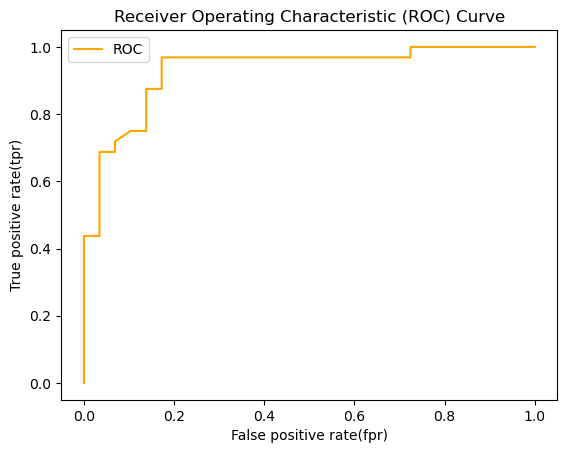

In [183]:
plot_roc_curve(fpr, tpr)

In [184]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive )

0.9304956896551724

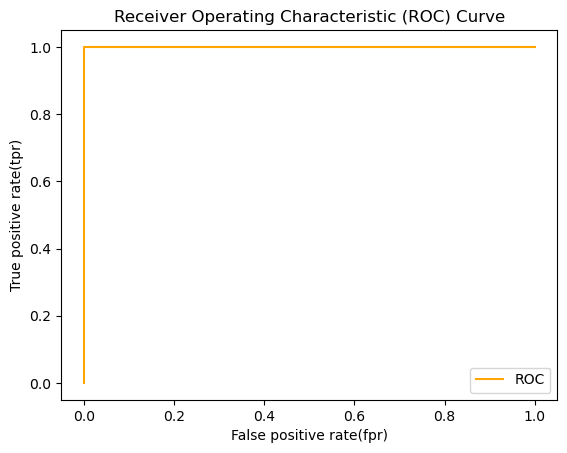

In [185]:
# Plot perfect ROC curve and AUC score 
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

#### 4. Confusion matrix

In [186]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [187]:
# Visualize confusion matrix with crosstab
pd.crosstab(y_test, y_preds,
           rownames=["Actual Labels"],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [ ]:
# Make our confusion matrix more visual with Seaborn's heatmap()